# AI and Deep Learning - midterm_exam (Part 1)

#### Author: Ivan Flores Martinez

## Import libraries

In [1]:
# Import the libraries
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
%matplotlib inline
import os
import json
import random
import cv2
from matplotlib import pyplot as plt
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

## Load the data

In [2]:
# Specify path to images
img_dir = "E:/Pascal VOC 2012.v3-416x416.coco/train"

In [3]:
# Register dataset
from detectron2.data.datasets import register_coco_instances
register_coco_instances("pascal", {}, "E:/Pascal VOC 2012.v3-416x416.coco/train/_annotations.coco.json", "E:/Pascal VOC 2012.v3-416x416.coco/train/")

In [4]:
# Get dataset metadata and load images
from detectron2.data import MetadataCatalog
pascal_metadata = MetadataCatalog.get("pascal")
dataset_dicts = DatasetCatalog.get("pascal")

WARNING [03/01 11:39:56 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/01 11:39:56 d2.data.datasets.coco]: Loaded 13690 images in COCO format from E:/Pascal VOC 2012.v3-416x416.coco/train/_annotations.coco.json


In [5]:
# Print classes in dataset
MetadataCatalog.get("pascal").thing_classes 

['VOC',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

## Visualize images

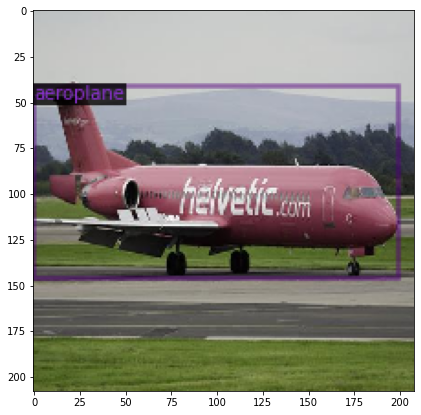

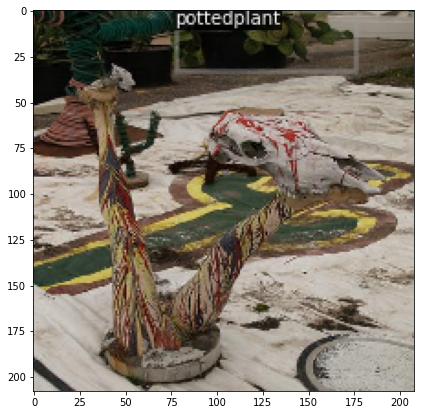

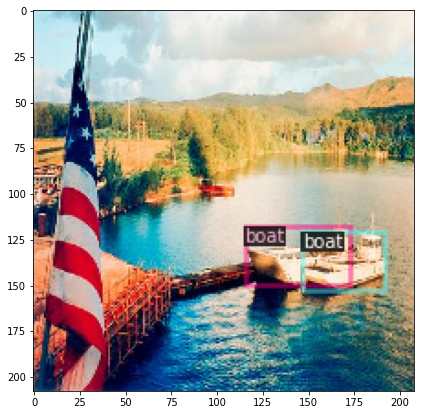

In [6]:
# Plot images in training dataset
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=pascal_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(15,7))
    plt.imshow(out.get_image()[:, :, ::-1][..., ::-1])

## Train the model

In [7]:
# Import DefaultTrainer from the engine module and config file
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

# Load config file
cfg = get_cfg()

# Modify config file
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("pascal",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1

# Let training initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

# Specify batch size, learning rate and other hyperparameters
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 500
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, enough for this dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20  # twenty classes
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Train the model
trainer.train()

[03/01 11:40:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (21, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (21,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (80, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (80,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[03/01 11:40:06 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\USER\.conda\envs\detectron\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/01 11:40:17 d2.utils.events]:  eta: 0:01:48  iter: 19  total_loss: 3.566  loss_cls: 2.915  loss_box_reg: 0.6754  loss_rpn_cls: 0.01601  loss_rpn_loc: 0.009829  time: 0.2290  data_time: 0.0785  lr: 3.8962e-05  max_mem: 2349M
[03/01 11:40:22 d2.utils.events]:  eta: 0:01:42  iter: 39  total_loss: 2.882  loss_cls: 2.19  loss_box_reg: 0.7484  loss_rpn_cls: 0.01121  loss_rpn_loc: 0.005005  time: 0.2253  data_time: 0.0010  lr: 7.8922e-05  max_mem: 2349M
[03/01 11:40:26 d2.utils.events]:  eta: 0:01:41  iter: 59  total_loss: 1.626  loss_cls: 0.9703  loss_box_reg: 0.6011  loss_rpn_cls: 0.007009  loss_rpn_loc: 0.008127  time: 0.2272  data_time: 0.0008  lr: 0.00011888  max_mem: 2349M
[03/01 11:40:31 d2.utils.events]:  eta: 0:01:36  iter: 79  total_loss: 1.547  loss_cls: 0.7974  loss_box_reg: 0.6846  loss_rpn_cls: 0.009747  loss_rpn_loc: 0.009921  time: 0.2269  data_time: 0.0008  lr: 0.00015884  max_mem: 2349M
[03/01 11:40:35 d2.utils.events]:  eta: 0:01:32  iter: 99  total_loss: 1.325  loss_cl

## Save the model

In [8]:
# Save model to folder
from detectron2.checkpoint import DetectionCheckpointer, Checkpointer
checkpointer = DetectionCheckpointer(trainer, save_dir=cfg.OUTPUT_DIR)
checkpointer.save("pascal")  

## Get predictions from model

In [9]:
# Load saved model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

# Create predictions for test dataset
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ("pascal", )
predictor = DefaultPredictor(cfg)

## Plot images with predictions

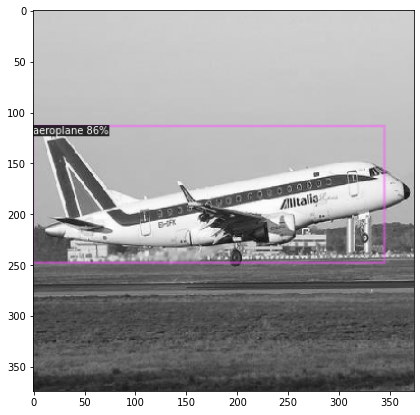

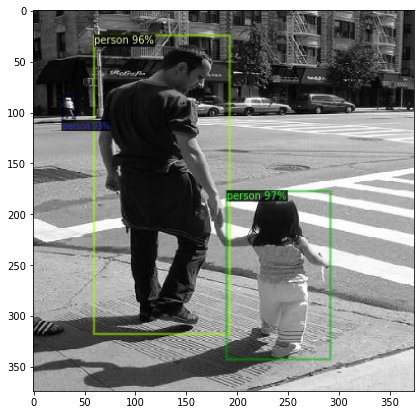

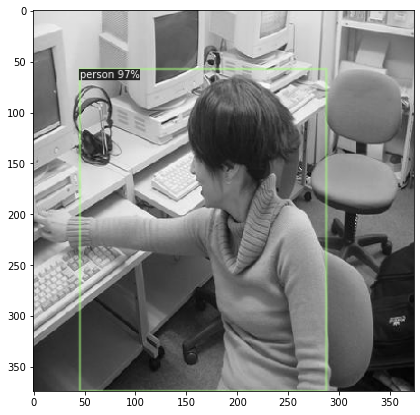

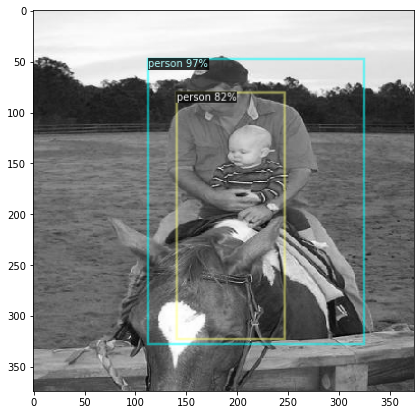

In [19]:
# Plot images in test dataset
from detectron2.utils.visualizer import ColorMode

# Take four random images from test data visualize them
for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=pascal_metadata, 
                   scale=0.9, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(15,7))
    plt.imshow(v.get_image()[:, :, ::-1][..., ::-1])